<a href="https://colab.research.google.com/github/Musu1/Udacity_DataScience/blob/master/ModelEvaluationClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Model Evaluation metrics for Classification model**

In this example we are using spam classifier data,so if a message is not spam and is sent to spam can result into missing of important message but if message is spam and sent to not spam it won't be a big mistake.

In this we are focussing more on **False positive** then on false negative. So in Random forest classifier gives 0 FP and best model for this which can be visualized from confusion matrix.

So we will focus more on **precision score** then recall score. as recall score is from first column of confusion matrix but precision score is from first row of confusion matrix(which has false positive).Random forest has 100 percent precision score.


# Import

In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
import tests as t

# PreProcessing

In [2]:
data=pd.read_table('11data',names=['label','messages'])
data.loc[:,'label']=data.label.map({'ham':0,'spam':1})
data.head()

,label,messages
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# Implementing BoW model





In [0]:
x_train,x_test,y_train,y_test=train_test_split(data['messages'],data['label'],random_state=1)
vectorizer=CountVectorizer()
training_data=vectorizer.fit_transform(x_train)
testing_data=vectorizer.transform(x_test)

# Models

In [0]:
naive_bayes = MultinomialNB()
bag_mod = BaggingClassifier(n_estimators=200)
rf_mod = RandomForestClassifier(n_estimators=200)
ada_mod = AdaBoostClassifier(n_estimators=300, learning_rate=0.2)
svm_mod = SVC()

In [5]:
naive_bayes.fit(training_data, y_train)
bag_mod.fit(training_data, y_train)
rf_mod.fit(training_data, y_train)
ada_mod.fit(training_data, y_train)
svm_mod.fit(training_data, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
preds_nb = naive_bayes.predict(testing_data)
preds_bag = bag_mod.predict(testing_data)
preds_rf = rf_mod.predict(testing_data)
preds_ada = ada_mod.predict(testing_data)
preds_svm = svm_mod.predict(testing_data)

# **Confusion Matrix**

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[[ 174   11]
 [   5 1203]]


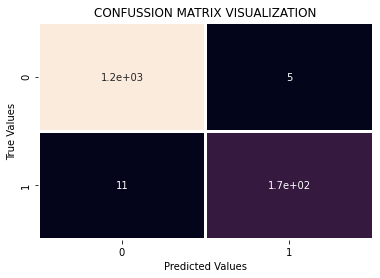

In [8]:
print(confusion_matrix(y_test,preds_nb,labels=[1,0]))
sns.heatmap(confusion_matrix(y_test,preds_nb),annot=True,lw =2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSSION MATRIX VISUALIZATION")
plt.show()

[[ 166   19]
 [  17 1191]]


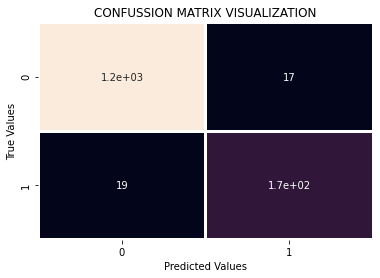

In [9]:
print(confusion_matrix(y_test,preds_bag,labels=[1,0]))
sns.heatmap(confusion_matrix(y_test,preds_bag),annot=True,lw =2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSSION MATRIX VISUALIZATION")
plt.show()

[[ 158   27]
 [   5 1203]]


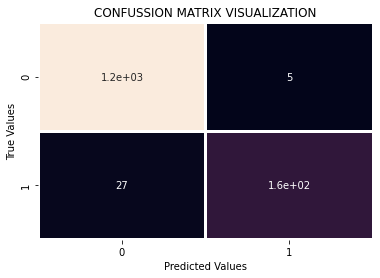

In [10]:
print(confusion_matrix(y_test,preds_ada,labels=[1,0]))
sns.heatmap(confusion_matrix(y_test,preds_ada),annot=True,lw =2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSSION MATRIX VISUALIZATION")
plt.show()

[[ 160   25]
 [   0 1208]]


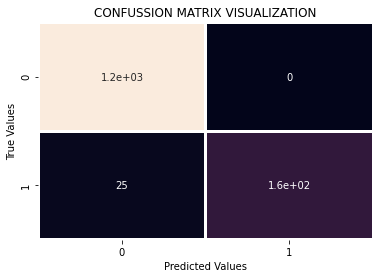

In [11]:
print(confusion_matrix(y_test,preds_rf,labels=[1,0]))
sns.heatmap(confusion_matrix(y_test,preds_rf),annot=True,lw =2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSSION MATRIX VISUALIZATION")
plt.show()

[[ 165   20]
 [   1 1207]]


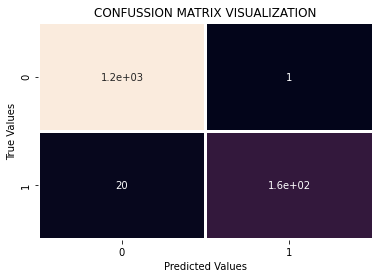

In [12]:
print(confusion_matrix(y_test,preds_svm,labels=[1,0]))
sns.heatmap(confusion_matrix(y_test,preds_svm),annot=True,lw =2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSSION MATRIX VISUALIZATION")
plt.show()

# **F1 Score**

In [0]:
from sklearn.metrics import f1_score

In [16]:
print('Naive Bayes F1 Score -',f1_score(y_test,preds_nb))
print('Bagging F1 Score -',f1_score(y_test,preds_bag))
print('AdaBoost F1 Score -',f1_score(y_test,preds_ada))
print('Random Forest F1 Score -',f1_score(y_test,preds_rf))
print('SVM F1 Score -',f1_score(y_test,preds_svm))

Naive Bayes F1 Score - 0.9560439560439562
Bagging F1 Score - 0.9021739130434783
AdaBoost F1 Score - 0.9080459770114943
Random Forest F1 Score - 0.927536231884058
SVM F1 Score - 0.9401709401709402


# **Accuracy Score**

In [0]:
from sklearn.metrics import accuracy_score

In [21]:
print('Naive Bayes accuracy_score -',accuracy_score(y_test,preds_nb))
print('Bagging accuracy_score -',accuracy_score(y_test,preds_bag))
print('AdaBoost accuracy_score -',accuracy_score(y_test,preds_ada))
print('Random Forest accuracy_score-',accuracy_score(y_test,preds_rf))
print('SVM accuracy_score-',accuracy_score(y_test,preds_svm))

Naive Bayes accuracy_score - 0.9885139985642498
Bagging accuracy_score - 0.9741564967695621
AdaBoost accuracy_score - 0.9770279971284996
Random Forest accuracy_score- 0.9820531227566404
SVM accuracy_score- 0.9849246231155779


# **Precision Score**

In [0]:
from sklearn.metrics import precision_score

In [23]:
print('Naive Bayes precision_score -',precision_score(y_test,preds_nb))
print('Bagging precision_score -',precision_score(y_test,preds_bag))
print('AdaBoost precision_score -',precision_score(y_test,preds_ada))
print('Random Forest precision_score-',precision_score(y_test,preds_rf))
print('SVM precision_score-',precision_score(y_test,preds_svm))

Naive Bayes precision_score - 0.9720670391061452
Bagging precision_score - 0.907103825136612
AdaBoost precision_score - 0.9693251533742331
Random Forest precision_score- 1.0
SVM precision_score- 0.9939759036144579


# **Recall Score**

In [0]:
from sklearn.metrics import recall_score

In [25]:
print('Naive Bayes recall_score -',recall_score(y_test,preds_nb))
print('Bagging recall_score -',recall_score(y_test,preds_bag))
print('AdaBoost recall_score -',recall_score(y_test,preds_ada))
print('Random Forest recall_score-',recall_score(y_test,preds_rf))
print('SVM recall_score-',recall_score(y_test,preds_svm))

Naive Bayes recall_score - 0.9405405405405406
Bagging recall_score - 0.8972972972972973
AdaBoost recall_score - 0.8540540540540541
Random Forest recall_score- 0.8648648648648649
SVM recall_score- 0.8918918918918919


# **FBeta Score**

In [0]:
from sklearn.metrics import fbeta_score

In [28]:
print('Naive Bayes fbeta_score -',fbeta_score(y_test,preds_nb,beta=1))
print('Bagging fbeta_score -',fbeta_score(y_test,preds_bag,beta=1))
print('AdaBoost fbeta_score -',fbeta_score(y_test,preds_ada,beta=1))
print('Random Forest fbeta_score-',fbeta_score(y_test,preds_rf,beta=1))
print('SVM fbeta_score-',fbeta_score(y_test,preds_svm,beta=1))

Naive Bayes fbeta_score - 0.9560439560439562
Bagging fbeta_score - 0.9021739130434783
AdaBoost fbeta_score - 0.9080459770114943
Random Forest fbeta_score- 0.927536231884058
SVM fbeta_score- 0.9401709401709402


# **Score Report**

In [0]:
from sklearn.metrics import classification_report

In [19]:
print('Naive Bayes Report -')
print(classification_report(y_test,preds_nb))
print('Bagging Report-')
print(classification_report(y_test,preds_bag))
print('AdaBoost Report -')
print(classification_report(y_test,preds_ada))
print('Random Forest Report -')
print(classification_report(y_test,preds_rf))
print('SVM Report -')
print(classification_report(y_test,preds_svm))

Naive Bayes Report -
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1208
           1       0.97      0.94      0.96       185

    accuracy                           0.99      1393
   macro avg       0.98      0.97      0.97      1393
weighted avg       0.99      0.99      0.99      1393

Bagging Report-
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1208
           1       0.91      0.90      0.90       185

    accuracy                           0.97      1393
   macro avg       0.95      0.94      0.94      1393
weighted avg       0.97      0.97      0.97      1393

AdaBoost Report -
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1208
           1       0.97      0.85      0.91       185

    accuracy                           0.98      1393
   macro avg       0.97      0.92      0.95      1393
weighted avg       